# 3_Synthesise_Fund_History.ipynb¶
Take in the cleaned, processed Valuations files month by month. This is both PII and commercially sensitive data so it needs to be anonymised.

However, we need to keep the statistical integrity of the data so will use the SDV python library

## Top 10 Python Packages for Creating Synthetic Data

https://www.activestate.com/blog/top-10-python-packages-for-creating-synthetic-data/#:~:text=Top%2010%20Python%20Packages%20for%20Creating%20Synthetic%20Data,7%E2%80%93Gretel%20Synthetics%20...%208%208%E2%80%93Scikit-Learn%20...%20More%20items

## Top 3 Python Packages to Generate Synthetic Data.
https://towardsdatascience.com/top-3-python-packages-to-generate-synthetic-data-33a351a5de0c



# Use SDV (Synthetic Data Vault) to generate synthetic data.  

In truth, only the policy number needs to synthesised as everything else is a boolean that already has obfuscated the fund data.  All of teh end-of-month booleans are capturing if the set of funds in place at the end of a month have changed from the end of the previous month.  A change indicates a fund switch.

Just to demonstrate that the synthesiser generated more than a single column of synthetic data, I have left in the 202207 column which was the original starting point for a set of funds.  It will play no part in any future model, I just left it here to demo the synthesiser.

### Use SDV - Synthetic Data Vault
This is a Python package to generate synthetic data based on the dataset provided. The generated data could be single-table, multi-table, or time-series, depending on the scheme you provided in the environment. Also, the generated would have the same format properties and statistics as the provided dataset.

SDV generates synthetic data by applying mathematical techniques and machine learning models such as the deep learning model. Even if the data contain multiple data types and missing data, SDV will handle it, so we only need to provide the data (and the metadata when required).

Let’s try to generate our synthetic data with SDV. First, we need to install the package.

pip install sdv

### The SDV creates synthetic data using machine learning. A synthesizer is an object that you can use to accomplish this task.
1.  You'll start by creating a synthesizer based on your metadata
2.  Next, you'll train the synthesizer using real data. In this phase, the synthesizer will learn patterns from the real data.
3.  Once your synthesizer is trained, you can use it to generate new, synthetic data.

https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api

In [1]:
# importing the librarIES
import csv
import os                           # For file processing.
#import pandas as pd            # For dataframes.
import datetime
#import numpy
#import psutil 
#import gc
#import hashlib

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

import psutil 
import gc

from sdv.datasets.local import load_csvs
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.single_table import CTGANSynthesizer

## Set all runtime variables.

In [2]:
# I put in time and memory usage stats during exploration, just to measure performance.
e = datetime.datetime.now()
print ("Current date and time = %s" % e)
print ("Current memory available = ",psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

# File names
merged_file_prefix = "Policy_Fund_Agg_"
synthetic_file_prefix = "Policy_Fund_Agg_Synth_"


Full_History_Filename = 'C:/Users/m033\MSc\Big_Data_Project\data\output/Full_Fund_Investment_History.csv'





Switches_By_Month = 'C:/Users/m033/IFRS17/output/Switches_By_Month.csv'

Current date and time = 2023-04-22 14:58:51.049111
Current memory available =  31.72485287230225


In [3]:
# I put in time and memory usage stats during exploration, just to measure performance.
e = datetime.datetime.now()
print ("Current date and time = %s" % e)
print ("Current memory available = ",psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

# File names
Switches_By_Month = r'C:\Users\m033\MSc\Big_Data_Project\data\azure/Switches_By_Month.csv'

Current date and time = 2023-04-22 14:59:28.211364
Current memory available =  32.57777308455333


In [4]:
e = datetime.datetime.now()
print ("Current date and time = %s" % e)
print ("Current memory available = ",psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

from sdv.datasets.local import load_csvs

# Use the pre CSV file named 'Switches_By_Month.csv'
datasets = load_csvs(folder_name=r'C:\Users\m033\MSc\Big_Data_Project\data\azure/')

# the data is available under the file name
#Switches_table = datasets['Full_Fund_Investment_History']
Switches_table = datasets['Switches_By_Month']
Switches_table

Current date and time = 2023-04-22 14:59:29.834874
Current memory available =  32.50683695249381


,POL_NUMB,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212,202301,202302,API_TRANCHE_EXT,202303
0,001045160#,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,132935.50,TSDGBTSDITTSEETTSSITTSYGB
1,001045178#,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,17894.80,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB
2,001046154#,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,TSESS,7669.30,TSESS
3,001047062#,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,TSDGB,2556.40,TSDGB
4,001049026#,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,TSESD,2556.40,TSESD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265863,8157682K,x,x,x,x,x,x,x,x,x,x,x,x,x,x,6768.00,XBEAAXBEAS
265864,8157702V,x,x,x,x,x,x,x,x,x,x,x,x,x,x,1200.00,5024A
265865,8157705J,x,x,x,x,x,x,x,x,x,x,x,x,x,x,2400.00,XBEAAXBEAS
265866,8157728W,x,x,x,x,x,x,x,x,x,x,x,x,x,x,2802.96,5024A


In [5]:
row_count = len(Switches_table)
row_count

265868

In [6]:
# 2. Generate single table metadata from the dataframe.
metadata = SingleTableMetadata()
#metadata
#print("metadata-",metadata) 
    
# 3. Auto detect metadata - The real fund switch data comes with no pre-prepared metadata automatically 
#    detect and generate the metadata based on the real data. 
metadata.detect_from_dataframe(data=Switches_table)
metadata

{
    "columns": {
        "POL_NUMB": {
            "sdtype": "categorical"
        },
        "202201": {
            "sdtype": "categorical"
        },
        "202202": {
            "sdtype": "categorical"
        },
        "202203": {
            "sdtype": "categorical"
        },
        "202204": {
            "sdtype": "categorical"
        },
        "202205": {
            "sdtype": "categorical"
        },
        "202206": {
            "sdtype": "categorical"
        },
        "202207": {
            "sdtype": "categorical"
        },
        "202208": {
            "sdtype": "categorical"
        },
        "202209": {
            "sdtype": "categorical"
        },
        "202210": {
            "sdtype": "categorical"
        },
        "202211": {
            "sdtype": "categorical"
        },
        "202212": {
            "sdtype": "categorical"
        },
        "202301": {
            "sdtype": "categorical"
        },
        "202302": {
            "sdtype":

In [8]:
# Possible options are:
# (default) None: Use the default distribution for the column name.
# One of: 'norm' 'beta', 'truncnorm', 'uniform', 'gamma' or 'gaussian_kde'
# default_distribution: Set the distribution shape to use by default for all columns. Input this as a single string.
# (default) 'beta': Model the column as a beta distribution
# One of: 'norm' 'beta', 'truncnorm', 'uniform', 'gamma' or 'gaussian_kde'

synthesizer = GaussianCopulaSynthesizer(
    metadata,
    #enforce_min_max_values=True,
    numerical_distributions={
        'POL_NUMB': 'norm'
            #'POL_NUMB': 'beta'
            #'POL_NUMB': 'norm',
            #'DUB_NAME': 'norm',
       #'API_TRANCHE_EXT': 'uniform'
    #        'API_TRANCHE_EXT': 'beta'
          
    }
    #    default_distribution='norm'
    )
    
   
synthesizer.fit(Switches_table)
synthetic_data = synthesizer.sample(num_rows=row_count)
synthetic_data

C:\Users\m033\Anaconda3\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'API_TRANCHE_EXT'. Data will not be rounded.
  warnings.warn(


,POL_NUMB,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212,202301,202302,API_TRANCHE_EXT,202303
0,6608255A,x,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSEAMTSEETTSESS,TSDGBTSDITTSEETTSSITTSYGB,AUWPXXSEBMXSEDEXSEIE,CUWP6XSDITXSEIEXSETHXSGRN,XSDIVXSEDBXSEDEXSEIEXTNUS,CUWP5XSEDEXSEIEXSETH,XFDEEXFTPIXINAEXJPRDXMLEMXSDIVXSEAMXSEBMXSEDDX...,BUWP6XSEDEXSEIEXSETHXSGRN,XINAEXSDITXSDIVXSEIEXSKN4,861.802517,BUWP5XSEIEXSETHXTNUS
1,8105799B,XFDEEXMLEMXSEDEXSETHXSGRN,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,TUEDE,TUEBMTUEBMTUEBMTUEBMTUEBMTUEBMTUEDDTUEDDTUEDDT...,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,SUEETSUSIT,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,XSDITXSETHXSGRNXSKN1XSKN3,XJPRDXSEAMXSEBM,5525AXREAAXREAS,XFTPIXMLEMXSDITXSEITXSETHXSGRNXSKN4XSSIT,TUDGBTUDGTTUDITTUEAMTUEETTUESSTUYGB,XFDEEXSETHXSGRNXSKN4,CUWPYXSEAMXSEIEXSGRN,1679.138546,XMLEMXSDIVXSETHXSKN3
2,8157748J,x,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TUDGBTUDGTTUECMTUEDBTUESS,XMLEMXSEAMXSEIEXSETHXSGRNXSKN4,XINAEXSDITXSEITXSETHXSGRNXSSITXTNUS,XSEAMXSEBMXSEDEXSEIEXTNUS,XFDEEXFTPIXSDIVXSEBMXSEDEXSEIE,XMLEMXSEIEXSETHXSKN4XSKN5,5024AXMLEMXSEIEXSGRNXSKN3XSKN4,7039.652363,5525AXINAEXMLEMXSGRN
3,8090117X,XINAEXSDITXSEBMXSEITXSGRN,TUDGBTUDGBTUDGBTUYGBTUYGBTUYGBTUYGB,TUDGBTUEETTUYGB,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TSDGBTSEAMTSEDBTSYGB,TUEAMTUEBATUEBSTUESDTUESS,TUEAMTUEBATUEBMTUEBS,5024AXSETHXSGRN,CUWP6XSDITXSEDEXSEIEXSETHXSGRNXTNUS,5024AXINAEXSEIEXSETHXSGRN,CUWP6XSDIVXSEAMXSEDEXSEIEXTNUS,XSEIEXSKN8,5024AXFDEEXMLEMXSDIVXSEIEXSETHXSGRNXSKN4XTNUS,XSDITXSDIVXSEDEXSEIEXTNUS,6932.500521,TUDITTUEDETUEETTUESSTUYGB
4,8099943Q,BUWP6XINAEXSETHXSGRN,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,SUDITSUEAMSUEETSUESDSUSIT,TUDITTUDITTUEETTUEETTUESSTUESS,BUWP6XFDEEXINAEXSDIVXSEDEXSETHXSGRNXSKN4XTNUS,TUDITTUDITTUEETTUEETTUESS,TUDGBTUDGBTUEAMTUEAMTUSGBTUSGBTUYGBTUYGB,SUDGTSUDGTSUDGTSUDGTSUDGTSUDGTSUDGTSUDGTSUDGTS...,TUSK3TUSK5,TSDGBTSEETTSESS,TUDGBTUDGBTUDITTUDITTUEDETUEDETUSGBTUSGBTUSITT...,AUWPTAUWPTAUWPTPUWPTPUWPTPUWPT,TUDITTUEDETUEDETUEDETUEDETUEETTUYGBTUYGBTUYGBT...,XFDEEXMLEMXSDIVXSEDEXSEIEXSKN1XSKN3XTNUS,10472.967590,5524AXFDEEXTNUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265863,6132282K,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,TUECMTUECMTUECMTUECMTUECMTUECMTUECMTUECMTUECMT...,TUEBMTUEETTUESD,SUEAASUEAASUEAASUEAASUEAASUEAASUEAASUEAASUEAAS...,XMLEMXSEDEXSEIEXSEITXSETH,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TSDGBTSEDETSESSTSYGB,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,SUDITSUEAMSUECMSUEDBSUESDSUSGBSUYGB,TSDGBTSESSTSYGB,TUEBMTUEDETUEET,x,TUDGBTUDITTUEAMTUEDETUEETTUESDTUESSTUYGB,TSESS,6364.571960,TSDGBTSDITTSEETTSSITTSYGB
265864,6235075W,XINAEXMLEMXSDIVXSEIEXSEIPXSETHXSGRNXSKN3XTNUS,TUEDETUESSTUYGB,SUSK1SUSK1SUSK1SUSK1SUSK1SUSK1SUSK1SUSK1SUSK1S...,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,XFDEEXFTPIXSDIVXSEBMXSEDEXSEIE,SUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMS...,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TUDGBTUDITTUEDETUSK1TUSK3TUSK4,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,AUWPTPUWPT,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDITT...,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TSDGBTSEAMTSEDETSEETTSYGB,334.767602,TUEDETUEDETUEDETUESDTUESDTUESD
265865,6620924K,x,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSESS,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TUDGBTUDITTUEAMTUEDETUSIT,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TSESS,TUDGBTUDITTUEDETUEETTUESDTUESSTUSGBTUSITTUYGB,5024AXFDEEXMLEMXSDIVXSEDEXSEITXSETHXSGRN,BUWP6XFDEEXINAEXMLEMXSEDEXSGRNXSKN1XSKN3XSKN4X...,5024AXSEIEXSKN3,2814.341845,5024AXMLEMXSEIEXSETHXSGRNXSKN3
26586

In [18]:
synthetic_data

,POL_NUMB,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212,202301,202302,API_TRANCHE_EXT,202303
0,6622353P,x,TSDGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSESSTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,AUWPXXTNUS,XMLEMXSEDEXSETHXSGRNXSKN4XTNUS,CUWP5XSEAMXSEDD,XFTPIXMLEMXSDITXSEITXSETHXSGRNXSKN1XSKN3XSKN4X...,5024AXSGRNXSKN3,XSEIE,CUWP6XSDIVXSEAMXSETH,2257.6,XSEDB
1,6124493M,XFDEEXSKN4XSKN5,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAM,TUECMTUEDBTUEDE,TUDGBTUDGBTUDGTTUDGTTUEAMTUEAMTUEBMTUEBMTUEETT...,TUDGBTUDGBTUEBMTUEBM,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TSEDETSESD,CUWP6XSEAMXSEIPXSETH,XMLEMXSEIEXSEIPXSETHXSGRNXSK10XSKN3XSKN4,XFDEEXSDITXSDIVXSEIEXSEITXSKN4,XINAEXSDITXSETHXSGRNXSKN1XSKN4,5024AXSDITXSDIVXSEIEXSETHXSGRN,XSDITXSETHXSGRNXSKN1,XFTPIXSDIVXSEBM,3726.2,SUEMLSUSK1SUSK4
2,8142908V,x,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSESD,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,XSEDEXSEIEXSETHXSGRN,XFDEEXINAEXMLEMXSDIVXSEDEXSEIEXSKN4XTNUS,5024AXSETHXSGRNXSKN3,5024AXSDITXSEITXSSIT,XINAEXMLEMXSDITXSEITXSKN4,XSDITXSK10,XSDIVXSEBMXSETHXSGRN,2022.0,5024AXFDEEXMLEMXSDIVXSEIEXSETHXSGRNXSKN4XTNUS
3,8098713V,XINAEXSDITXSEBMXSEITXSGRN,SUDGBSUEAMSUEDESUYGB,SUDITSUDITSUDITSUDITSUDITSUDITSUDITSUDITSUDITS...,TUSK1TUSK3,SUDITSUDITSUDITSUDITSUDITSUEETSUEETSUEETSUEETS...,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,TUEDETUEDETUEDETUEDETUEDETUEDETUEDETUEDETUEDET...,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUEAMTUEAMT...,XSDITXSKN3XTNUS,5024AXFDEEXFTPIXSDIVXSEBMXSKN4,XSDIVXSEITXSETHXSGRNXSKN4,AUWPZXSDIVXSEAMXSETH,XSDITXSEIEXTNUS,5024AXSDIVXSGRNXSKN3XSKN7,675.0,XSKN1XSKN4
4,6299267#,BUWP6XSEIEXSKN1,TUDGBTUEAMTUESS,TUDGTTUDITTUEAMTUEBMTUESS,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUESSTUESST...,TUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBAT...,SUASCSUASCSUASCSUASCSUASCSUASCSUASCSUASCSUASCS...,TUESSTUESSTUESSTUESSTUESSTUESSTUESSTUESSTUYGBT...,TUDITTUDITTUDITTUEAATUEAATUEAATUEAATUEAATUEAAT...,TSESD,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,SUDITSUDITSUDITSUDITSUDITSUDITSUDITSUDITSUDITS...,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,XFDEEXINAEXSDITXSDIVXSEAMXSEIEXSETHXSGRNXSKN4X...,4334.1,XJPRDXSDIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265863,6065669M,TUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDGTTUDGTT...,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,TUEBMTUEBMTUEBMTUEBMTUEBMTUEBMTUEBMTUEBMTUEBMT...,SUDITSUEAMSUESS,5525AXFDEEXINAEXSDIVXSEDEXSEIE,TUDGTTUDGTTUEAMTUEAMTUEBMTUEBMTUECMTUECMTUEDBT...,TSDITTSEDETSEET,TUDGBTUDGBTUDGBTUDGBTUEAMTUEAMTUEAMTUEETTUEETT...,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,TUDGBTUDITTUEAMTUEBMTUEDETUESDTUESSTUSGBTUYGB,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,TSDGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,1457.0,TUDITTUDITTUDITTUDITTUDITTUEDETUEDETUEDETUEDET...
265864,6152888W,BUWP5XMLEMXSEIEXSKN4,TUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBAT...,SUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMSUEBMS...,TUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBATUEBAT...,XSGRNXTNUS,TUDGBTUEDETUESDTUSGBTUYGB,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,SUDGTSUEAMSUEDESUYGB,TUEDETUSK1TUSK3TUSK4,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,TUEDBTUEDBTUEDBTUEDBTUEDBTUEDETUEDETUEDETUEDET...,TUDITTUEAMTUEBMTUECMTUEDBTUSIT,8544.000000000002,TUDGBTUEAMTUEDETUYGB
265865,7009007#,XFDEEXMLEMXSEDEXSETHXSGRN,TSDITTSEETTSSIT,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TSDGBTSDITTSEETTSSITTSYGB,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,SUDITSUEETSUYGB,TUDGBTUDITTUEDETUEETTUESDTUSGBTUSITTUYGB,SUDGTSUDGTSUEDBSUEDB,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,XMLEMXSEIEXSKN3,XFDEEXMLEMXSDIVXSEDEXSEIEXSKN4,2063.2,XSEDEXTNUS
265866,6800625W,x,TSDG

# 1. Read in the switches by month data.

In [7]:
#yearmonth='202201'

#merged_file  =  merged_file_prefix + yearmonth + '.csv'
#merged_file_path = os.path.join(".\data\merged", merged_file)
#print("Merged_file_path-",merged_file_path) 
    
# Use the pre CSV file named 'Switches_By_Month.csv'
#datasets = load_csvs(folder_name='C:/Users/m033\MSc\Big_Data_Project\data\output/Full_Fund_Investment_History.csv')

Merged_file_path- .\data\merged\Policy_Fund_Agg_202201.csv


IndexError: list index out of range

In [5]:



# the data is available under the file name
#Switches_table = datasets['Policy_Fund_Agg_202205']
Switches_table_name = 'Policy_Fund_Agg_' + yearmonth
Switches_table = datasets[Switches_table_name]
Switches_table

Merged_file_path- .\data\merged\Policy_Fund_Agg_202201.csv


IndexError: list index out of range

In [21]:
row_count = len(Switches_table)
row_count

94276

In [22]:
# 2. Generate single table metadata from the dataframe.
metadata = SingleTableMetadata()
#metadata
#print("metadata-",metadata) 
    
# 3. Auto detect metadata - The real fund switch data comes with no pre-prepared metadata automatically 
#    detect and generate the metadata based on the real data. 
metadata.detect_from_dataframe(data=Switches_table)
metadata

{
    "columns": {
        "POL_NUMB": {
            "sdtype": "categorical"
        },
        "API_TRANCHE_EXT": {
            "sdtype": "numerical"
        },
        "DUB_NAME": {
            "sdtype": "categorical"
        },
        "RUN_MONTH": {
            "sdtype": "numerical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

In [23]:
#from sdv import SDV
#
#sdv = SDV()
#sdv.fit(metadata, Switches_table)

In [24]:
synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,
    #numerical_distributions={
    #    'POL_NUMB': 'norm',
            #'POL_NUMB': 'beta'
            #'POL_NUMB': 'norm',
            #'DUB_NAME': 'norm',
       #'API_TRANCHE_EXT': 'uniform'
    #        'API_TRANCHE_EXT': 'beta'
          
    #}
    #    default_distribution='norm'
    )
    
   
synthesizer.fit(Switches_table)
synthetic_data = synthesizer.sample(num_rows=row_count)

C:\Users\m033\Anaconda3\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'API_TRANCHE_EXT'. Data will not be rounded.
  warnings.warn(


In [25]:
synthetic_data

,POL_NUMB,API_TRANCHE_EXT,DUB_NAME,RUN_MONTH
0,8086458Z,2145.906206,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,202201
1,8072373B,2082.832672,TUESDTUESDTUESDTUESDTUESDTUESDTUESDTUESDTUESDT...,202201
2,006256347#,1303.460294,TUDGBTUEAMTUEDETUEETTUSGBTUYGB,202201
3,8044346M,8937.590286,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,202201
4,8051951R,11374.219338,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,202201
...,...,...,...,...
94271,006360110#,30119.077024,TUDGBTUDGBTUDITTUDITTUEAMTUEAMTUEDETUEDETUEETT...,202201
94272,006328402#,4088.094023,TUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBTUDGBT...,202201
94273,006270273#,3979.067910,TUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMTUEAMT...,202201
94274,006370346#,2242.827938,TUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITTUDITT...,202201


In [87]:
synthesizer = CTGANSynthesizer(
        metadata, # required
        enforce_rounding=False,
        epochs=1500,
        verbose=True
    )
    
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(Switches_table)

C:\Users\m033\Anaconda3\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'API_TRANCHE_EXT'. Data will not be rounded.
  warnings.warn(


MemoryError: Unable to allocate 33.1 GiB for an array with shape (94276, 94276) and data type int32

In [ ]:







synthetic_data = synthesizer.sample(num_rows=10)
    
    
    
    
    
    
    
    
    
    
    
    
    #synthesizer = GaussianCopulaSynthesizer(metadata)
#    synthesizer = GaussianCopulaSynthesizer(
#        metadata,
#        enforce_min_max_values=True,
#        epochs= 500,
#        numerical_distributions={
#            'POL_NUMB': 'none',
#            #'POL_NUMB': 'beta'
#            #'POL_NUMB': 'norm',
#            #'DUB_NAME': 'norm',
#            'API_TRANCHE_EXT': 'uniform'
#        #    'API_TRANCHE_EXT': 'beta'
#            
#        },
#        #default_distribution='norm'
#    )
#    
    
    #synthesizer.fit(df_real_data)
#    synthesizer.fit(Switches_table)

#    synthetic_data = synthesizer.sample(num_rows=100000)

    
    #synthetic_data = synthesizer.sample(num_rows=all)
    #synthetic_data.head(50)
    #print("synthetic_data-",synthetic_data) 

    # 5. Generate statistically equivalent synthetic data to protect the original data.
    synthetic_file  =  synthetic_file_prefix + yearmonth + '.csv'
    synthetic_file_path = os.path.join(".\data\merged", synthetic_file)
    print("synthetic_file_path-",synthetic_file_path) 
    
    # 7. Export the synthetic data to be used in Snowflake.
    # Write to a csv file and use index=false to drop teh index from the dataframe
    synthetic_data.to_csv(synthetic_file_path, encoding='utf-8', index=False)

In [81]:
def Generate_synthetic_data(yearmonth):
    merged_file  =  merged_file_prefix + yearmonth + '.csv'
    merged_file_path = os.path.join(".\data\merged", merged_file)
    print("Merged_file_path-",merged_file_path) 
    
    # Use the pre CSV file named 'Switches_By_Month.csv'
    datasets = load_csvs(folder_name=r'C:\Users\m033\MSc\Big_Data_Project\data\merged/')

    # the data is available under the file name
    #Switches_table = datasets['Policy_Fund_Agg_202205']
    Switches_table_name = 'Policy_Fund_Agg_' + yearmonth
    Switches_table = datasets[Switches_table_name]
    print("Switches_table-",Switches_table) 


    # 2. Generate single table metadata from the dataframe.
    metadata = SingleTableMetadata()
    #metadata
    #print("metadata-",metadata) 
    
    # 3. Auto detect metadata - The real fund switch data comes with no pre-prepared metadata automatically 
    #    detect and generate the metadata based on the real data. 
    metadata.detect_from_dataframe(data=Switches_table)
    #metadata.detect_from_dataframe(data=df_real_data)
    #metadata
    print("metadata-",metadata) 
    
    
    
    synthesizer = CTGANSynthesizer(
        metadata, # required
        enforce_rounding=False,
        epochs=1500,
        verbose=True
    )
    
    synthesizer = CTGANSynthesizer(metadata)
    synthesizer.fit(Switches_table)

    synthetic_data = synthesizer.sample(num_rows=10)
    
    
    
    
    
    
    
    
    
    
    
    
    #synthesizer = GaussianCopulaSynthesizer(metadata)
#    synthesizer = GaussianCopulaSynthesizer(
#        metadata,
#        enforce_min_max_values=True,
#        epochs= 500,
#        numerical_distributions={
#            'POL_NUMB': 'none',
#            #'POL_NUMB': 'beta'
#            #'POL_NUMB': 'norm',
#            #'DUB_NAME': 'norm',
#            'API_TRANCHE_EXT': 'uniform'
#        #    'API_TRANCHE_EXT': 'beta'
#            
#        },
#        #default_distribution='norm'
#    )
#    
    
    #synthesizer.fit(df_real_data)
#    synthesizer.fit(Switches_table)

#    synthetic_data = synthesizer.sample(num_rows=100000)

    
    #synthetic_data = synthesizer.sample(num_rows=all)
    #synthetic_data.head(50)
    #print("synthetic_data-",synthetic_data) 

    # 5. Generate statistically equivalent synthetic data to protect the original data.
    synthetic_file  =  synthetic_file_prefix + yearmonth + '.csv'
    synthetic_file_path = os.path.join(".\data\merged", synthetic_file)
    print("synthetic_file_path-",synthetic_file_path) 
    
    # 7. Export the synthetic data to be used in Snowflake.
    # Write to a csv file and use index=false to drop teh index from the dataframe
    synthetic_data.to_csv(synthetic_file_path, encoding='utf-8', index=False)

In [82]:
psutil.virtual_memory().available * 100 / psutil.virtual_memory().total

67.30494519193822

In [83]:
Synthetic_data = Generate_synthetic_data('202201')
Synthetic_data

Merged_file_path- .\data\merged\Policy_Fund_Agg_202201.csv
Switches_table-          POL_NUMB  API_TRANCHE_EXT                             DUB_NAME  \
0      001045160#        132935.50            TSDGBTSDITTSEETTSSITTSYGB   
1      001045178#         17894.80  TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB   
2      001046154#          7669.30                                TSESS   
3      001047062#          2556.40                                TSDGB   
4      001049026#          2556.40                                TSESD   
...           ...              ...                                  ...   
94271    8104009J           960.00                                BUWP6   
94272    8104037F          1200.00                                BUWP6   
94273    8104040S          6000.00            XINAEXMLEMXSEIEXSETHXSGRN   
94274    8104145Q           617.64                                BUWP6   
94275    8104280Z          2070.00                                BUWP6   

       RUN_MONTH  
0    

C:\Users\m033\Anaconda3\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'API_TRANCHE_EXT'. Data will not be rounded.
  warnings.warn(


MemoryError: Unable to allocate 33.1 GiB for an array with shape (94276, 94276) and data type int32

# 7. Export the synthetic data to be used in Snowflake.

In [ ]:
# Write to a csv file and use index=false to drop teh index from the dataframe
#synthetic_data.to_csv(Switches_synthetic_data, encoding='utf-8', index=False)

# 6. Evaluate the synthetic data against teh original, real data.

In [14]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=Switches_table,
    synthetic_data=synthetic_data,
    metadata=metadata)

Creating report:  50%|█████████████████████████████████▌                                 | 2/4 [02:46<02:46, 83.02s/it]C:\Users\m033\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
Creating report:  75%|██████████████████████████████████████████████████▎                | 3/4 [02:48<00:56, 56.29s/it]


MemoryError: Unable to allocate 6.99 GiB for an array with shape (9113, 102975) and data type float64

Use this function to receive some diagnostic results about your synthetic data. Check to see if the synthetic rows are pure copies of the real data, if the synthetic data covers the full range of values and if the synthetic data adheres to the original ranges. 

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=Switches_table,
    synthetic_data=synthetic_data,
    metadata=metadata)

Use this function to visualize a real column against the same synthetic column. You can plot any column of type: boolean, categorical, datetime or numerical. 

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=Switches_table,
    synthetic_data=synthetic_data,
    column_name='POL_NUMB',
    metadata=metadata
)
    
fig.show()

Plot the original data.

In [ ]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
Switches_table['Num_Switches'].plot(label='Number Of Switches', color='blue')
  
# adding title to the plot
plt.title('Fund switches per month')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

Plot the synthetic data to compare statistical integr

TypeError: no numeric data to plot

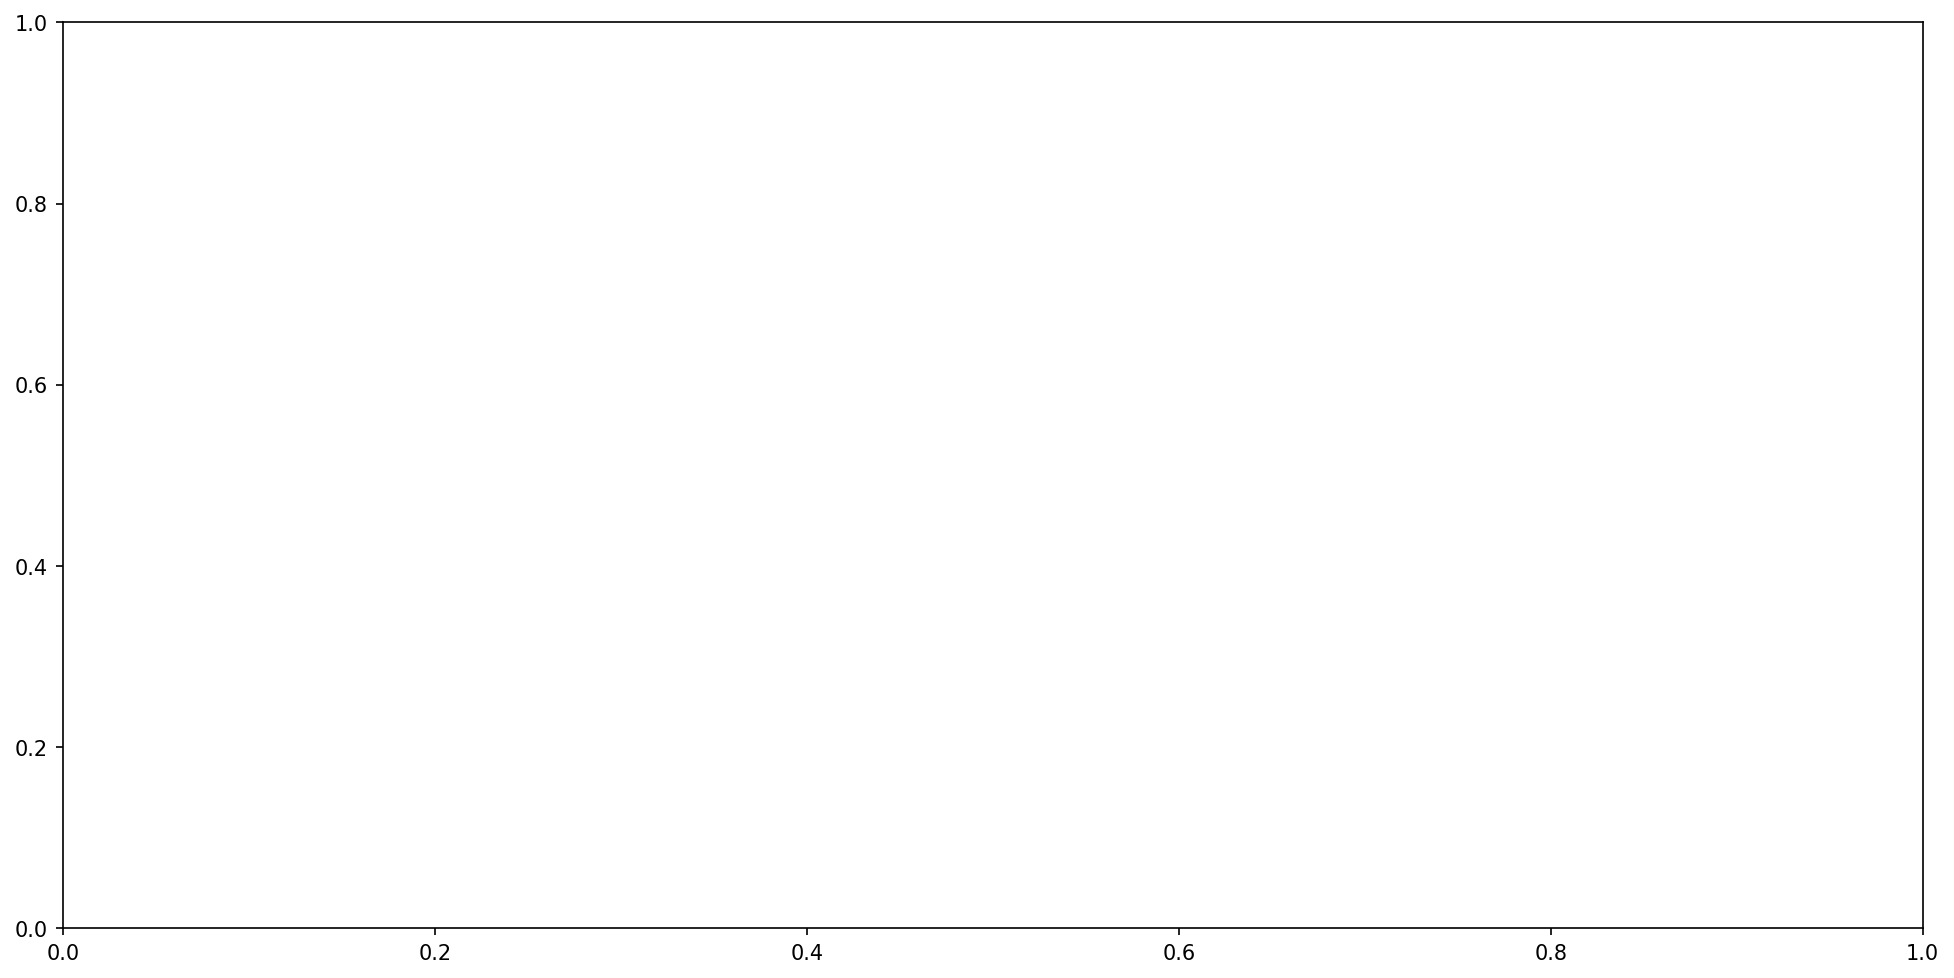

In [81]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
synthetic_data['POL_NUMB'].plot(label='Number Of Switches', color='blue')
  
# adding title to the plot
plt.title('Fund switches per month')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [62]:
%whos DataFrame

Variable         Type         Data/Info
---------------------------------------
Switches_table   DataFrame              POL_NUMB  API_T<...>[102975 rows x 4 columns]
synthetic_data   DataFrame          POL_NUMB           <...>18527.459563     202205  


In [63]:
psutil.virtual_memory().available * 100 / psutil.virtual_memory().total

27.75071840555521